## Exercici 1
Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

- Una variable categòrica (UniqueCarrier)
- Una variable numèrica (ArrDelay)
- Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
- Dues variables numèriques (ArrDelay i DepDelay)
- Tres variables (ArrDelay, DepDelay i UniqueCarrier)
- Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('DelayedFlights.csv', header=None)
df.columns = df.iloc[0]
df = df.iloc[1: , :]
df_seleccio = df[['ArrDelay','DepDelay', 'AirTime','UniqueCarrier']]


# Canviar data type per a determinades columnes i així poder fer càlculs
df_seleccio.loc[:,'ArrDelay'] = df_seleccio['ArrDelay'].astype(float)
df_seleccio.loc[:,'DepDelay'] = df_seleccio['DepDelay'].astype(float)
df_seleccio.loc[:,'AirTime'] = df_seleccio['AirTime'].astype(float)

# Mostreig
df_seleccio = df_seleccio.sample(n=50)


/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,5,6,7,8,10,12,13,14,15,16,19,20,21,22,24,25,26,27,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

**Variable categòrica**

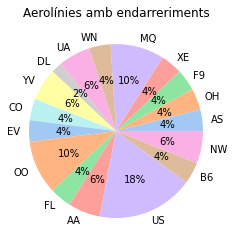

In [62]:
aerolinies_count = df_seleccio.groupby(['UniqueCarrier']).size().tolist()
aerolinies_noms = df_seleccio['UniqueCarrier'].unique().tolist()

data = aerolinies_count
labels = aerolinies_noms
colors = sns.color_palette('pastel')
uniqueCarrier = plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%')
plt.title('Aerolínies amb endarreriments')
plt.savefig('variable_categorica.png')
plt.show()

**Variable numérica**

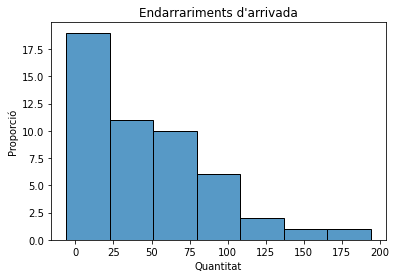

In [63]:
arrDelay = sns.histplot(data=df_seleccio, x="ArrDelay")
plt.title('Endarrariments d\'arrivada')
plt.ylabel('Proporció')
plt.xlabel('Quantitat')
plt.savefig('variable_numerica.png')
plt.show()

**Variable numérica i categòrica**

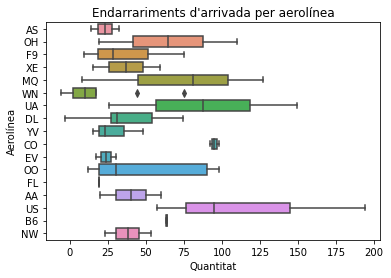

In [64]:
arrDelay_uniqueCarrier = sns.boxplot(x="ArrDelay", y="UniqueCarrier", data=df_seleccio)
plt.title('Endarrariments d\'arrivada per aerolínea')
plt.ylabel('Aerolínea')
plt.xlabel('Quantitat')
plt.savefig('variables_num_cat.png')
plt.show()

**Dues variables numèriques**

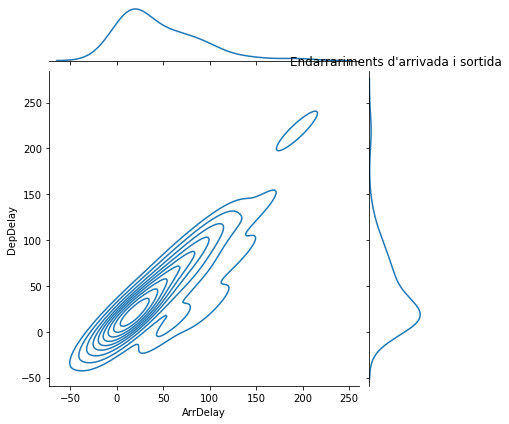

In [65]:
arrDelay_depDelay = sns.jointplot(x="ArrDelay", y="DepDelay", data=df_seleccio, kind="kde")
plt.title('Endarrariments d\'arrivada i sortida')
plt.savefig('variables_num.png')
plt.show()

**Tres variables (ArrDelay, DepDelay i UniqueCarrier)**

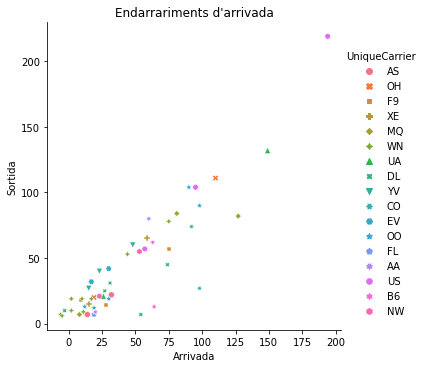

In [79]:
arrDelay_depDelay_uniqueCarrier = sns.relplot(data=df_seleccio, x="ArrDelay", y="DepDelay", hue="UniqueCarrier", kind='scatter', style="UniqueCarrier")
plt.title('Endarrariments d\'arrivada')
plt.ylabel('Sortida')
plt.xlabel('Arrivada')
plt.savefig('tres_variables.png')
plt.show()

**Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier)**

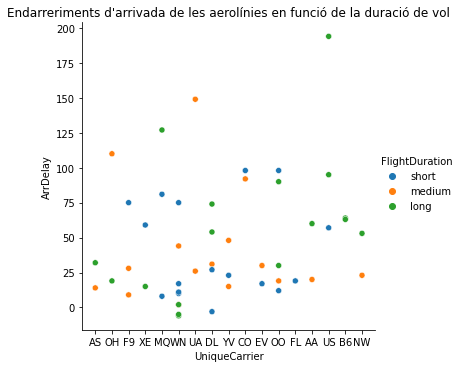

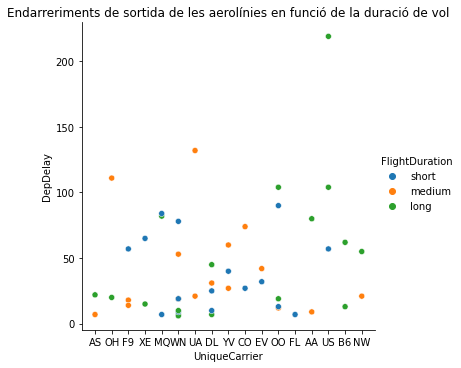

In [69]:
df_seleccio['FlightDuration'] = pd.qcut(df_seleccio['AirTime'], 3, labels=['short', 'medium', 'long'])

arrDelay_depDelay_uniqueCarrier_airTime = sns.relplot(x="UniqueCarrier", y="ArrDelay", hue= "FlightDuration", data=df_seleccio, sizes=(0.01, 100), legend="full")
plt.title("Endarreriments d'arrivada de les aerolínies en funció de la duració de vol")
plt.savefig('quatre_variables_a.png')
plt.show()

arrDelay_depDelay_uniqueCarrier_airTime = sns.relplot(x="UniqueCarrier", y="DepDelay", hue= "FlightDuration", data=df_seleccio, sizes=(0.01, 100), legend="full")
plt.title("Endarreriments de sortida de les aerolínies en funció de la duració de vol")
plt.savefig('quatre_variables_b.png')
plt.show()

## Exercici 2
Exporta els gràfics com imatges o com html

In [68]:
# Inclòs a l'exercici anterior